In [1]:
def getSample(df,spark):
    df = spark.sql("SELECT * FROM washing").sample(False, 0.1)
    return df

In [2]:
def getListForHistogramAndBoxPlot(df,spark):
    my_list = spark.sql("SELECT temperature from washing where temperature is not null").rdd.map(lambda row: row.temperature).collect()
    if not type(my_list)==list:
        raise Exception('return type not a list')
    return my_list

In [3]:
def getListsForRunChart(df,spark):
    double_tuple_rdd = spark.sql("select temperature,ts from washing where temperature is not null order by ts asc").sample(False,0.1).rdd.map(lambda row : (row.ts,row.temperature))
    result_array_ts = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[0]).collect()
    result_array_temperature = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[1]).collect()
    return (result_array_ts,result_array_temperature)

In [4]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-12-08 02:14:44--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-12-08 02:14:44--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-12-08 02:14:44--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [5]:
!pip install pyspark==2.4.5

In [6]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .getOrCreate()

In [7]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

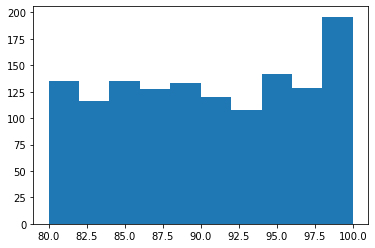

In [9]:
plt.hist(getListForHistogramAndBoxPlot(df,spark))
plt.show()

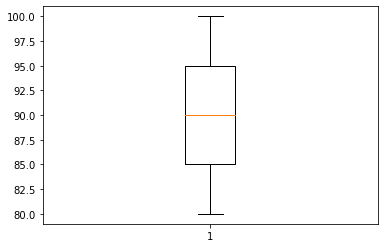

In [10]:

plt.boxplot(getListForHistogramAndBoxPlot(df,spark))
plt.show()

In [11]:
lists = getListsForRunChart(df,spark)

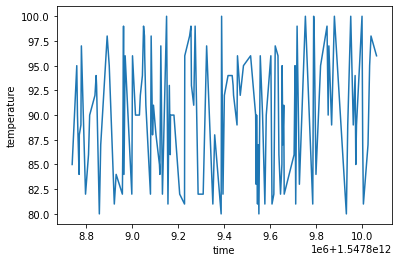

In [12]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

In [13]:
!rm -f rklib.py
!wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2020-12-08 02:15:18--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: ‘rklib.py’

rklib.py            100%[===================>]   2.48K  --.-KB/s    in 0s      

2020-12-08 02:15:18 (24.6 MB/s) - ‘rklib.py’ saved [2540/2540]



In [ ]:
from rklib import submitAll
import json
key = "S5PNoSHNEeisnA6YLL5C0g"
email = ###_YOUR_CODE_GOES_HERE_###,
token = ###_YOUR_CODE_GOES_HERE_### 

parts_data = {}
parts_data["iLdHs"] = json.dumps(str(type(getListForHistogramAndBoxPlot(df,spark))))
parts_data["xucEM"] = json.dumps(len(getListForHistogramAndBoxPlot(df,spark)))
parts_data["IyH7U"] = json.dumps(str(type(getListsForRunChart(df,spark))))
parts_data["MsMHO"] = json.dumps(len(getListsForRunChart(df,spark)[0]))

submitAll(email, token, key, parts_data)